In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("diabetes.csv")
print("✅ Dataset loaded successfully.")
print(df.head())


✅ Dataset loaded successfully.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# ❗Handle Missing Values

In [23]:

cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill missing values with median
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())

print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

# 📈 Feature Distributions by Outcome


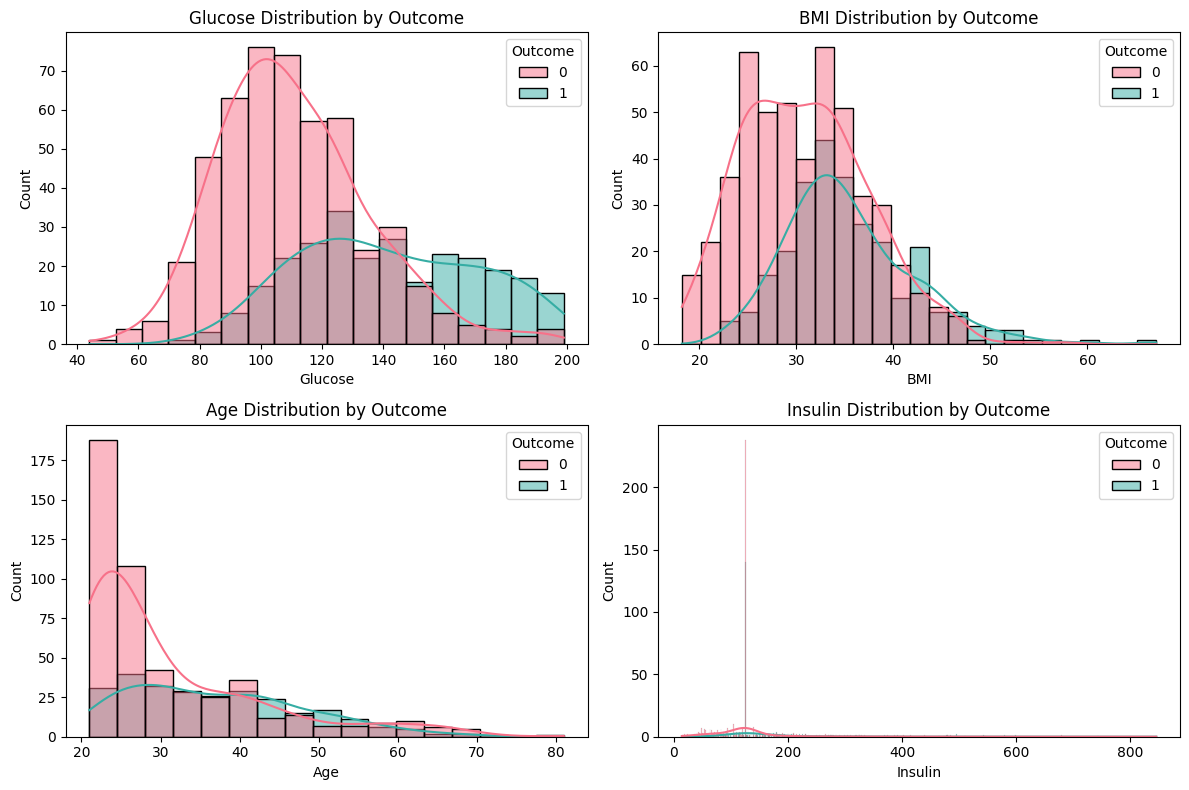

In [20]:
features = ["Glucose", "BMI", "Age", "Insulin"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, palette='husl')
    plt.title(f'{feature} Distribution by Outcome')

plt.tight_layout()
plt.show()



# Split Data

In [24]:

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Data split into training and test sets.")

#  Train Classification Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
acc = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy:", acc)
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))



✅ Data split into training and test sets.

✅ Accuracy: 0.7467532467532467

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Visualize Metrics

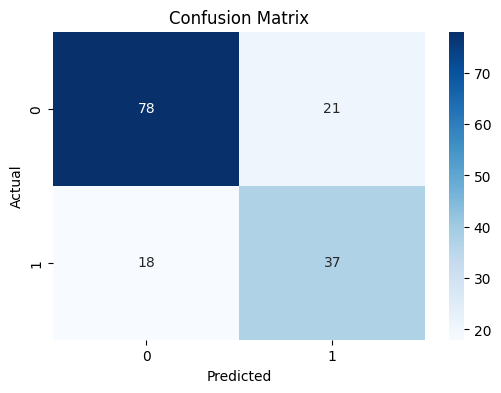

In [17]:

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Feature Importance

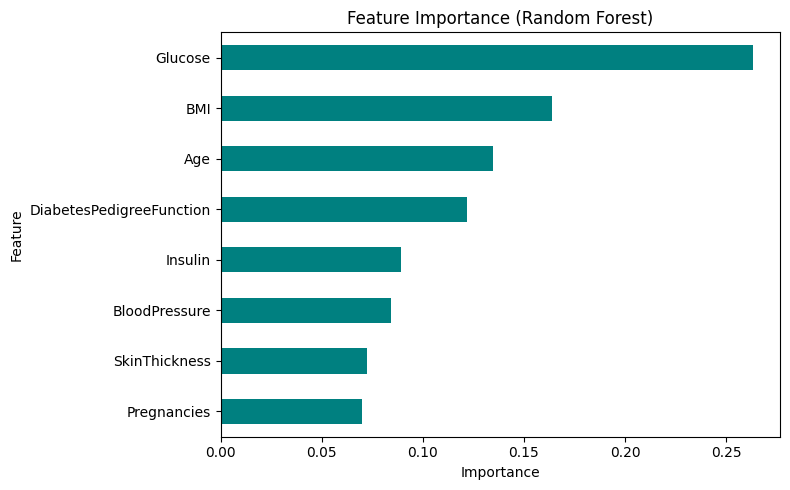

In [25]:

importances = model.feature_importances_
feat_names = X.columns
feat_df = pd.Series(importances, index=feat_names).sort_values()

plt.figure(figsize=(8, 5))
feat_df.plot(kind='barh', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



In [26]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("🔍 Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


🔍 Logistic Regression Accuracy: 0.7532467532467533


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("🌀 Cross-validation mean accuracy:", scores.mean())


🌀 Cross-validation mean accuracy: 0.7643833290892115


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("🔧 Best Parameters:", grid.best_params_)


🔧 Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


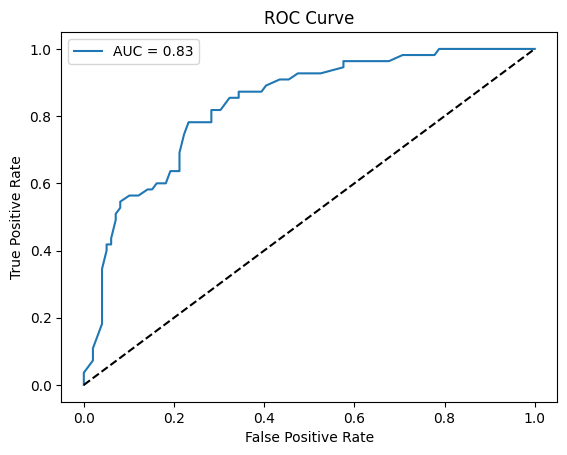

In [30]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
